In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import files
from keras.preprocessing import image
from keras.utils import to_categorical

print(tf.__version__)

2.3.0


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print("Done downloading")

AttributeError: ignored

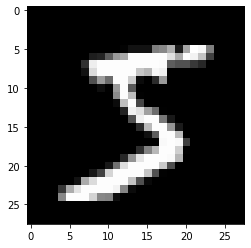

In [ ]:
plt.imshow(training_images[0], cmap = 'gray')
plt.show()

In [ ]:
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [ ]:
training_labels = to_categorical(training_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=3, callbacks=[callbacks])

Epoch 1/3
1875/1875 [==============================] - 162s 86ms/step - loss: 0.3957 - accuracy: 0.9540 - val_loss: 0.0944 - val_accuracy: 0.9715
Epoch 2/3
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0610 - accuracy: 0.9814 - val_loss: 0.0743 - val_accuracy: 0.9770
Epoch 3/3
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0421 - accuracy: 0.9872 - val_loss: 0.1057 - val_accuracy: 0.9753




Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


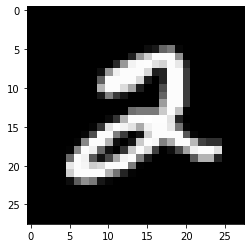



Final Output: 2


In [ ]:
example = training_images[5]
prediction = model.predict(example.reshape(1, 28, 28, 1))

hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

plt.imshow(example.reshape(28, 28), cmap = 'gray')
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

Saving MnistExamples.png to MnistExamples.png



----------------Contoured Image--------------------


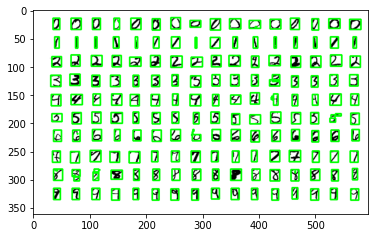

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = './' + fn

image = cv2.imread(path)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

=============Prediction=============


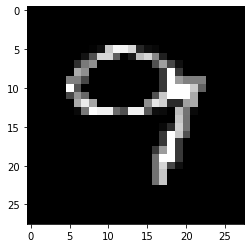



Prediction: 7
=============Prediction=============


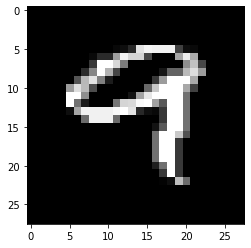



Prediction: 9
=============Prediction=============


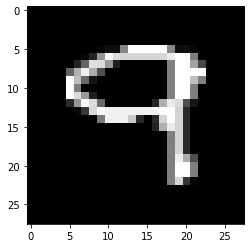



Prediction: 9
=============Prediction=============


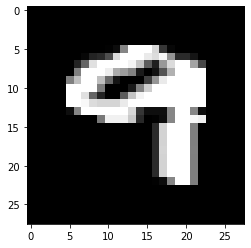



Prediction: 4
=============Prediction=============


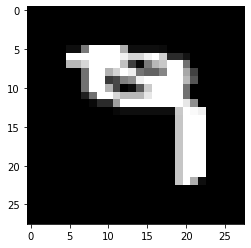



Prediction: 3
=============Prediction=============


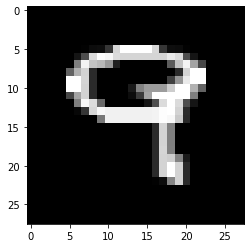



Prediction: 7
=============Prediction=============


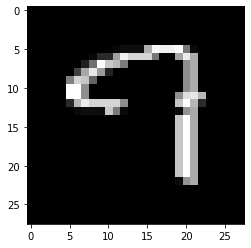



Prediction: 7
=============Prediction=============


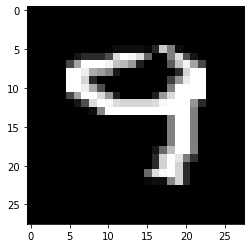



Prediction: 9
=============Prediction=============


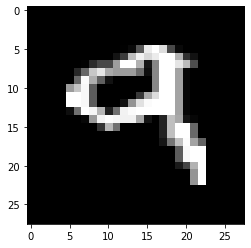



Prediction: 9
=============Prediction=============


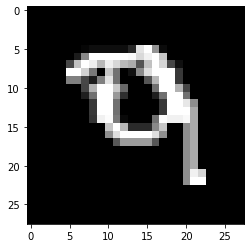



Prediction: 4
=============Prediction=============


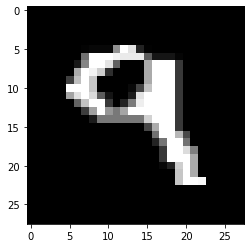



Prediction: 9
=============Prediction=============


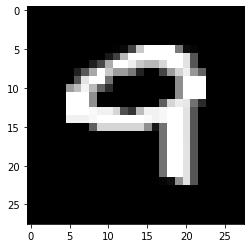



Prediction: 9
=============Prediction=============


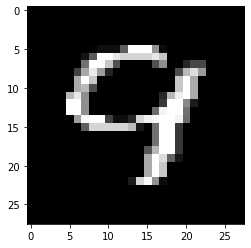



Prediction: 9
=============Prediction=============


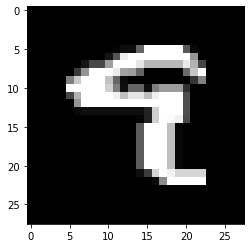



Prediction: 9
=============Prediction=============


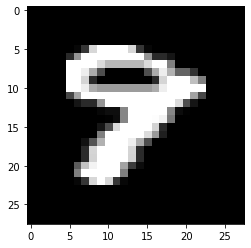



Prediction: 2
=============Prediction=============


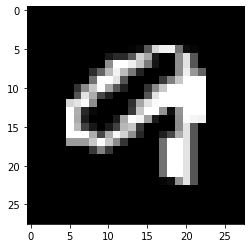



Prediction: 4
=============Prediction=============


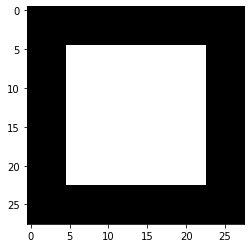



Prediction: 0
=============Prediction=============


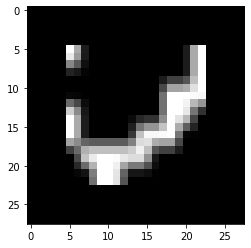



Prediction: 0
=============Prediction=============


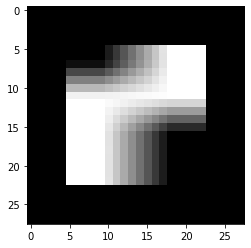



Prediction: 2
=============Prediction=============


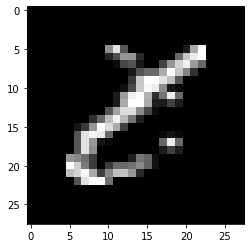



Prediction: 3
=============Prediction=============


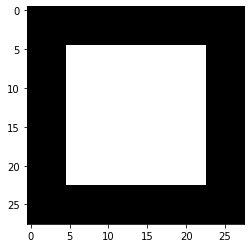



Prediction: 0
=============Prediction=============


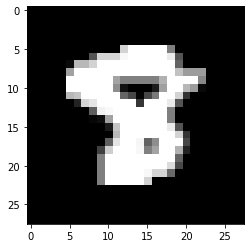



Prediction: 8
=============Prediction=============


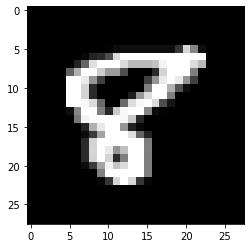



Prediction: 8
=============Prediction=============


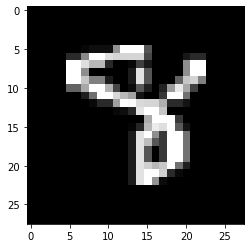



Prediction: 3
=============Prediction=============


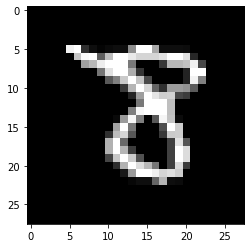



Prediction: 8
=============Prediction=============


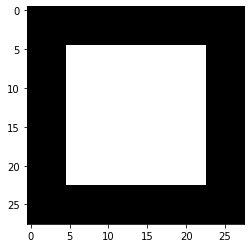



Prediction: 0
=============Prediction=============


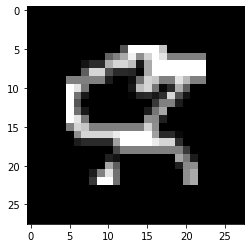



Prediction: 4
=============Prediction=============


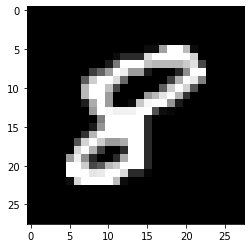



Prediction: 8
=============Prediction=============


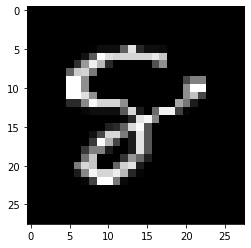



Prediction: 8
=============Prediction=============


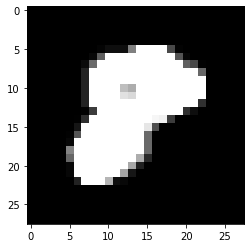



Prediction: 8
=============Prediction=============


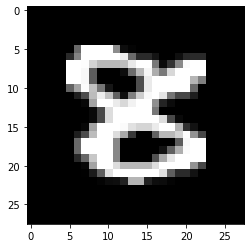



Prediction: 8
=============Prediction=============


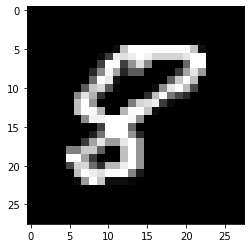



Prediction: 8
=============Prediction=============


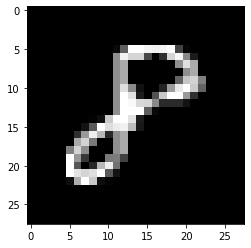



Prediction: 8
=============Prediction=============


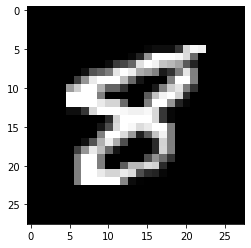



Prediction: 8
=============Prediction=============


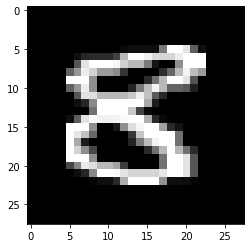



Prediction: 3
=============Prediction=============


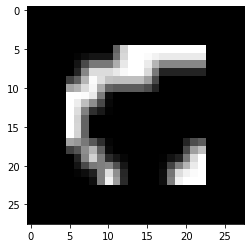



Prediction: 4
=============Prediction=============


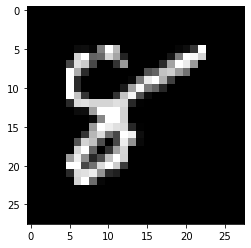



Prediction: 5
=============Prediction=============


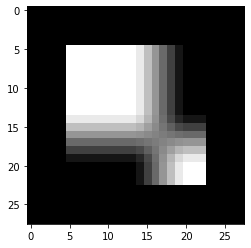



Prediction: 4
=============Prediction=============


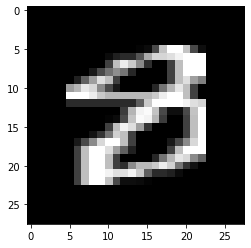



Prediction: 2
=============Prediction=============


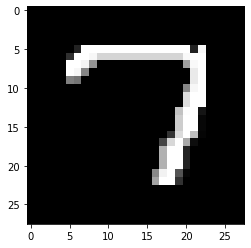



Prediction: 7
=============Prediction=============


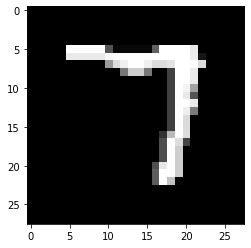



Prediction: 2
=============Prediction=============


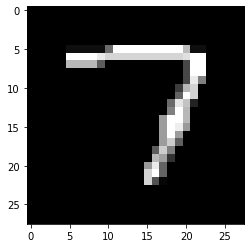



Prediction: 7
=============Prediction=============


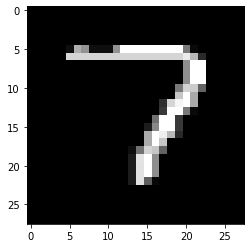



Prediction: 7
=============Prediction=============


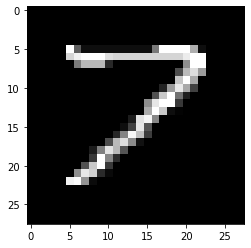



Prediction: 7
=============Prediction=============


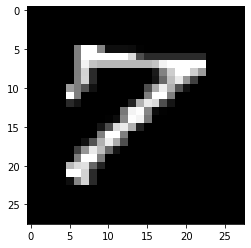



Prediction: 2
=============Prediction=============


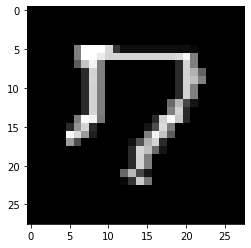



Prediction: 7
=============Prediction=============


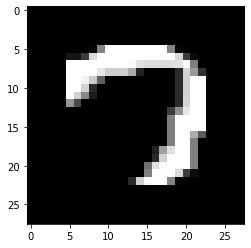



Prediction: 2
=============Prediction=============


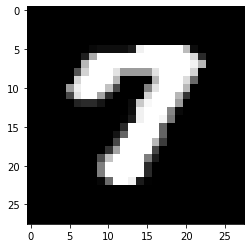



Prediction: 2
=============Prediction=============


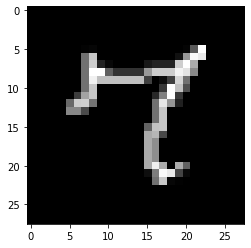



Prediction: 7
=============Prediction=============


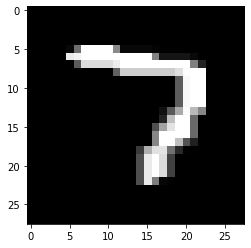



Prediction: 7
=============Prediction=============


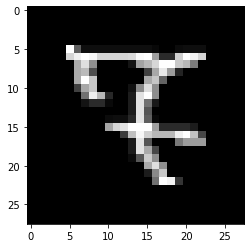



Prediction: 7
=============Prediction=============


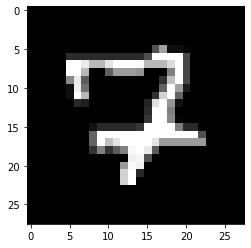



Prediction: 7
=============Prediction=============


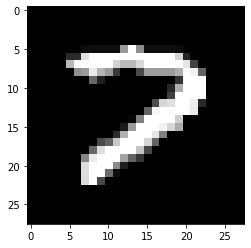



Prediction: 2
=============Prediction=============


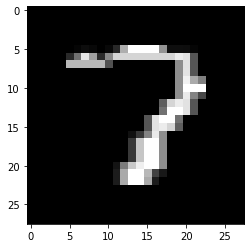



Prediction: 2
=============Prediction=============


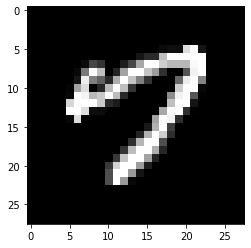



Prediction: 2
=============Prediction=============


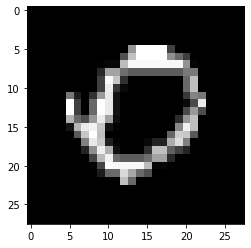



Prediction: 0
=============Prediction=============


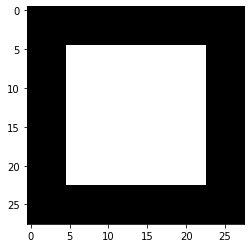



Prediction: 0
=============Prediction=============


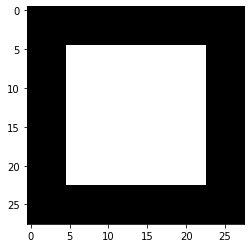



Prediction: 0
=============Prediction=============


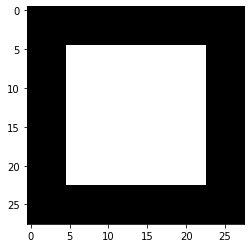



Prediction: 0
=============Prediction=============


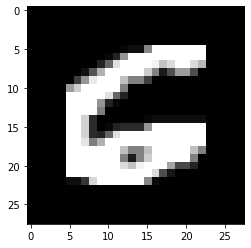



Prediction: 6
=============Prediction=============


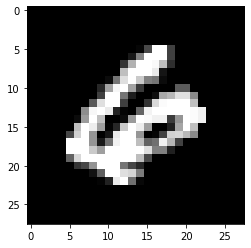



Prediction: 0
=============Prediction=============


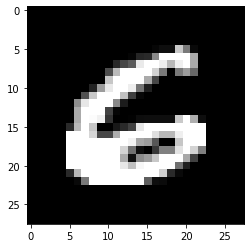



Prediction: 6
=============Prediction=============


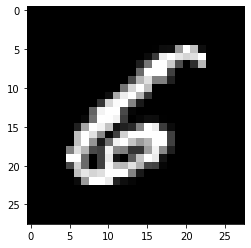



Prediction: 6
=============Prediction=============


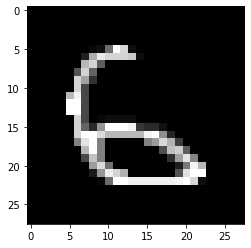



Prediction: 6
=============Prediction=============


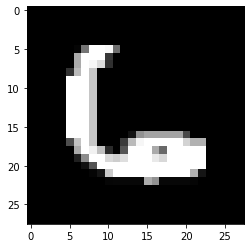



Prediction: 6
=============Prediction=============


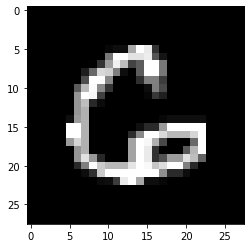



Prediction: 0
=============Prediction=============


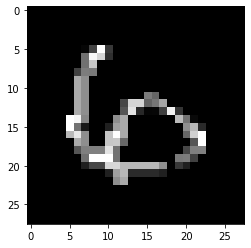



Prediction: 6
=============Prediction=============


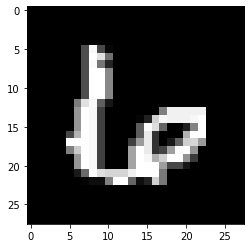



Prediction: 6
=============Prediction=============


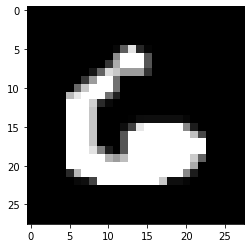



Prediction: 0
=============Prediction=============


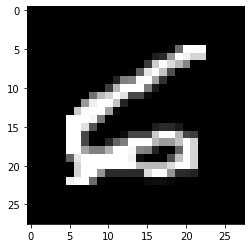



Prediction: 6
=============Prediction=============


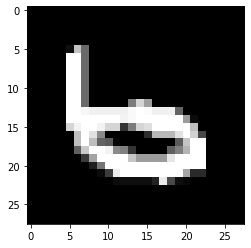



Prediction: 6
=============Prediction=============


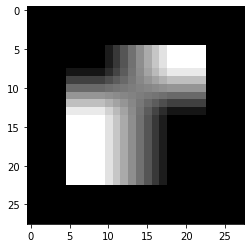



Prediction: 0
=============Prediction=============


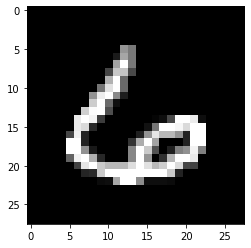



Prediction: 6
=============Prediction=============


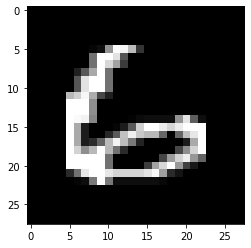



Prediction: 6
=============Prediction=============


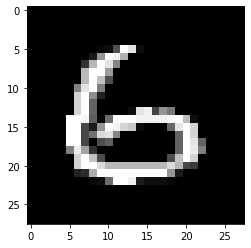



Prediction: 6
=============Prediction=============


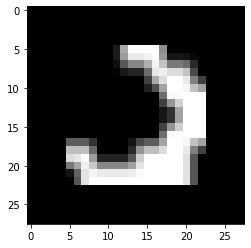



Prediction: 0
=============Prediction=============


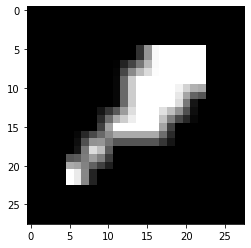



Prediction: 2
=============Prediction=============


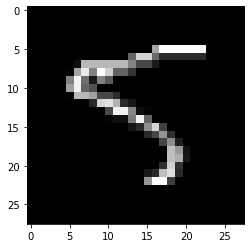



Prediction: 5
=============Prediction=============


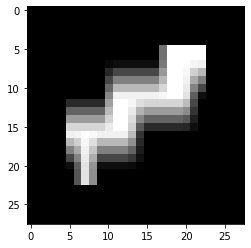



Prediction: 2
=============Prediction=============


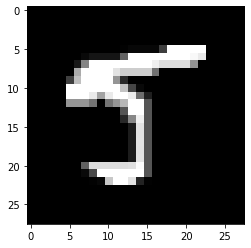



Prediction: 5
=============Prediction=============


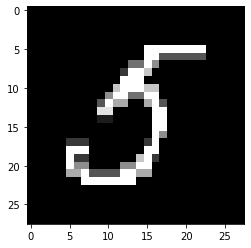



Prediction: 5
=============Prediction=============


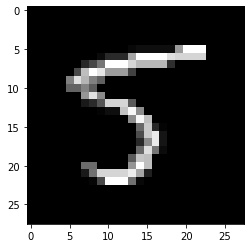



Prediction: 5
=============Prediction=============


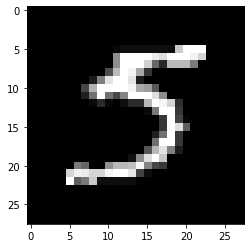



Prediction: 5
=============Prediction=============


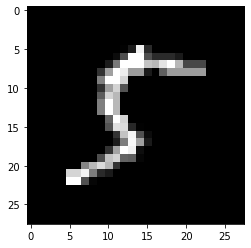



Prediction: 5
=============Prediction=============


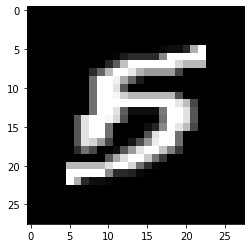



Prediction: 5
=============Prediction=============


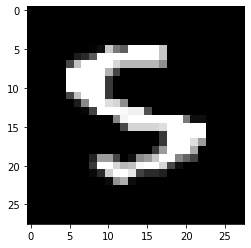



Prediction: 5
=============Prediction=============


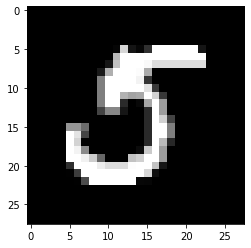



Prediction: 5
=============Prediction=============


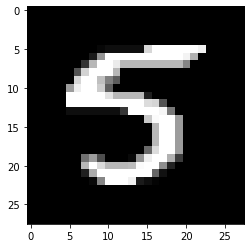



Prediction: 5
=============Prediction=============


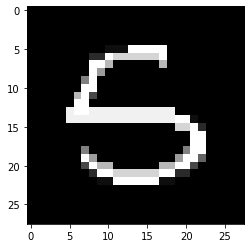



Prediction: 5
=============Prediction=============


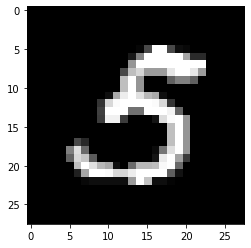



Prediction: 5
=============Prediction=============


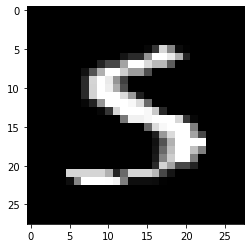



Prediction: 5
=============Prediction=============


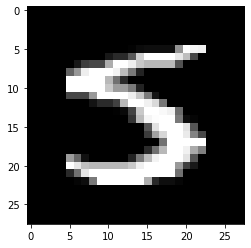



Prediction: 5
=============Prediction=============


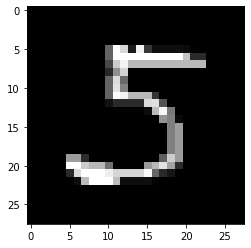



Prediction: 5
=============Prediction=============


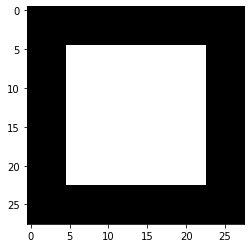



Prediction: 0
=============Prediction=============


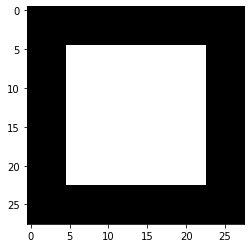



Prediction: 0
=============Prediction=============


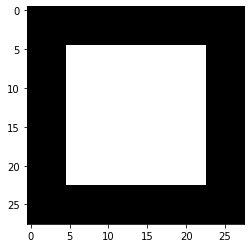



Prediction: 0
=============Prediction=============


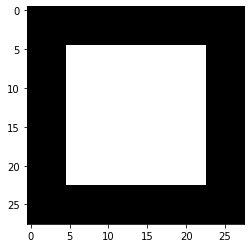



Prediction: 0
=============Prediction=============


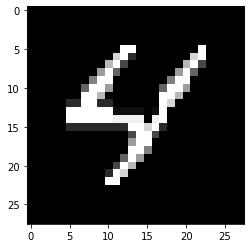



Prediction: 4
=============Prediction=============


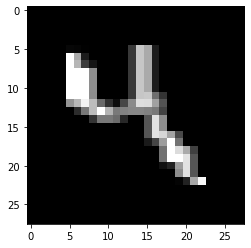



Prediction: 4
=============Prediction=============


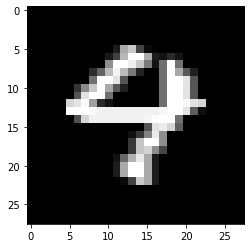



Prediction: 4
=============Prediction=============


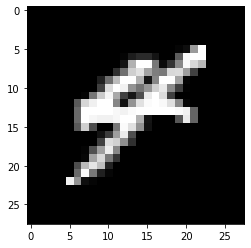



Prediction: 1
=============Prediction=============


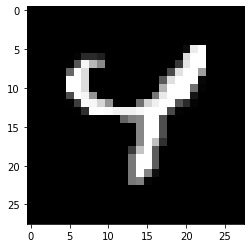



Prediction: 4
=============Prediction=============


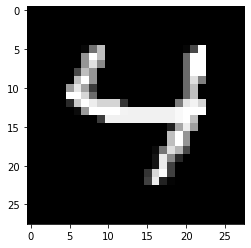



Prediction: 4
=============Prediction=============


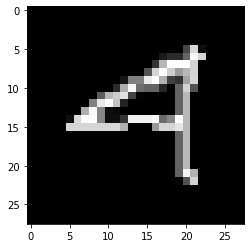



Prediction: 4
=============Prediction=============


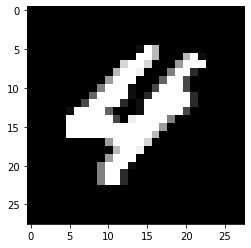



Prediction: 4
=============Prediction=============


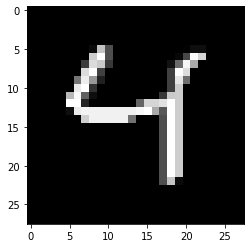



Prediction: 4
=============Prediction=============


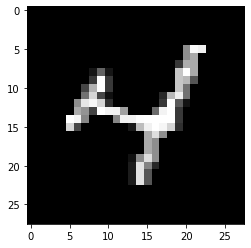



Prediction: 4
=============Prediction=============


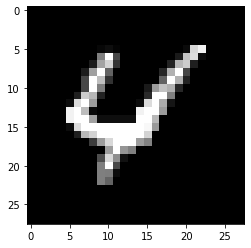



Prediction: 4
=============Prediction=============


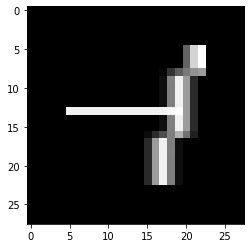



Prediction: 4
=============Prediction=============


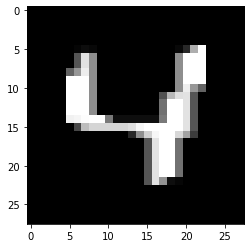



Prediction: 4
=============Prediction=============


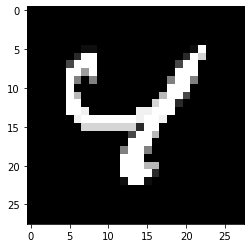



Prediction: 4
=============Prediction=============


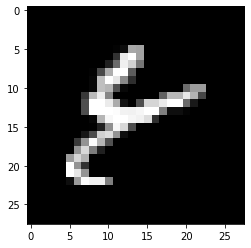



Prediction: 8
=============Prediction=============


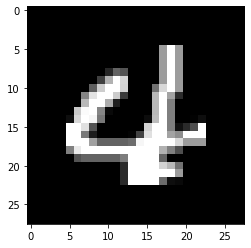



Prediction: 4
=============Prediction=============


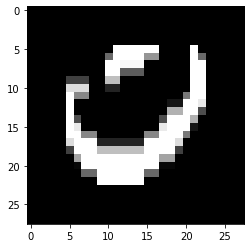



Prediction: 0
=============Prediction=============


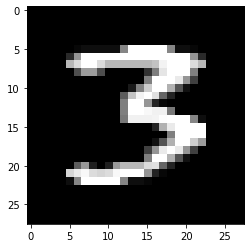



Prediction: 3
=============Prediction=============


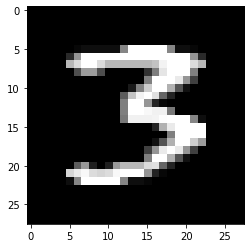



Prediction: 3
=============Prediction=============


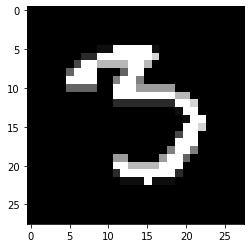



Prediction: 3
=============Prediction=============


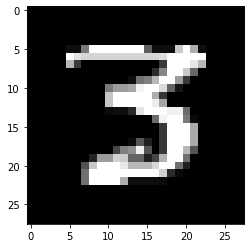



Prediction: 3
=============Prediction=============


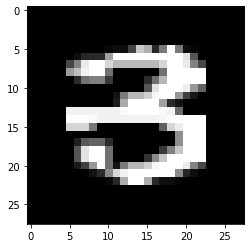



Prediction: 3
=============Prediction=============


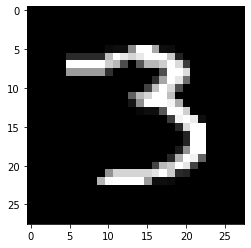



Prediction: 3
=============Prediction=============


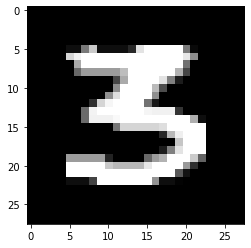



Prediction: 3
=============Prediction=============


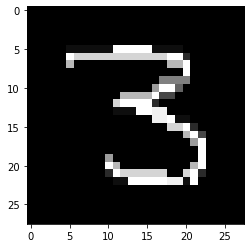



Prediction: 3
=============Prediction=============


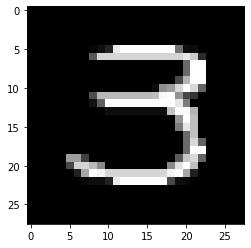



Prediction: 3
=============Prediction=============


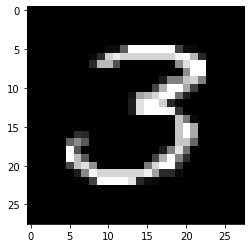



Prediction: 3
=============Prediction=============


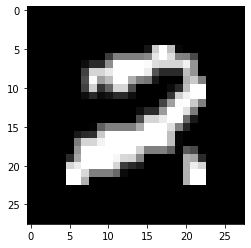



Prediction: 2
=============Prediction=============


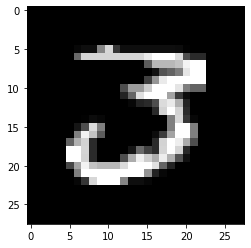



Prediction: 3
=============Prediction=============


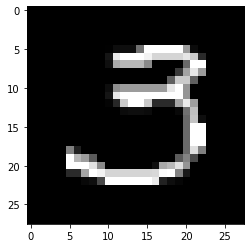



Prediction: 3
=============Prediction=============


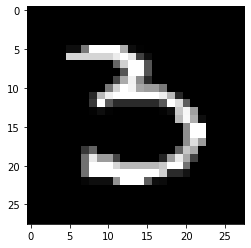



Prediction: 3
=============Prediction=============


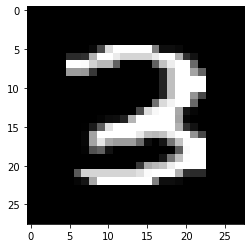



Prediction: 2
=============Prediction=============


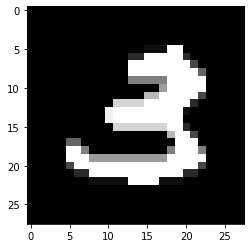



Prediction: 3
=============Prediction=============


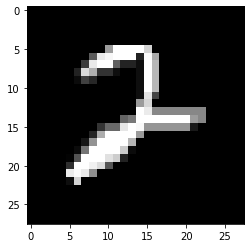



Prediction: 2
=============Prediction=============


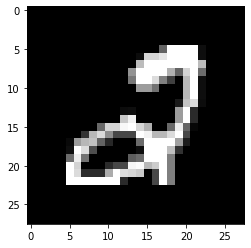



Prediction: 2
=============Prediction=============


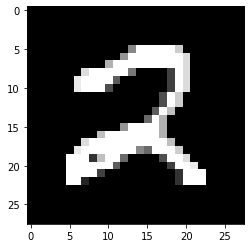



Prediction: 2
=============Prediction=============


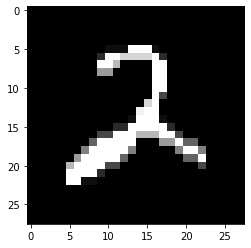



Prediction: 2
=============Prediction=============


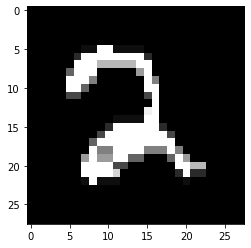



Prediction: 2
=============Prediction=============


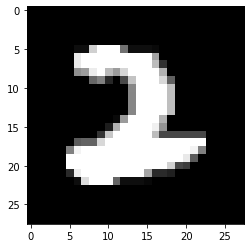



Prediction: 2
=============Prediction=============


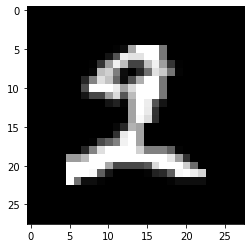



Prediction: 2
=============Prediction=============


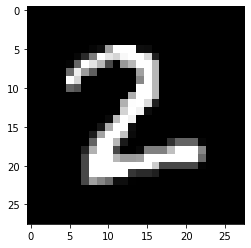



Prediction: 2
=============Prediction=============


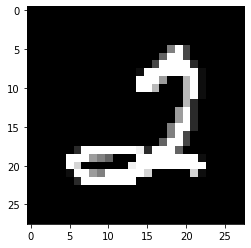



Prediction: 0
=============Prediction=============


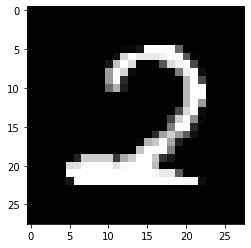



Prediction: 2
=============Prediction=============


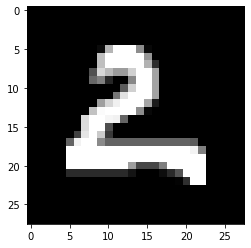



Prediction: 2
=============Prediction=============


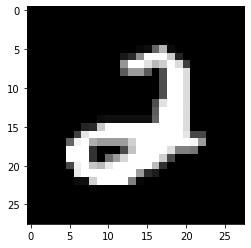



Prediction: 2
=============Prediction=============


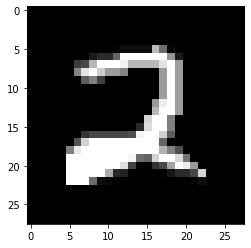



Prediction: 2
=============Prediction=============


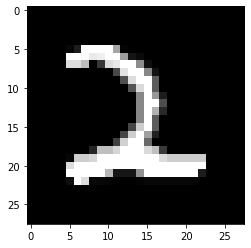



Prediction: 2
=============Prediction=============


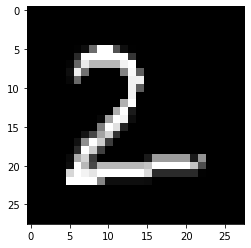



Prediction: 2
=============Prediction=============


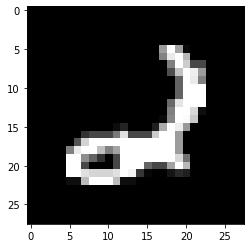



Prediction: 0
=============Prediction=============


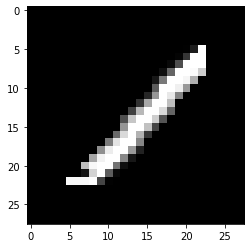



Prediction: 1
=============Prediction=============


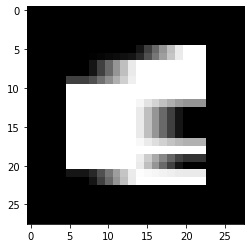



Prediction: 2
=============Prediction=============


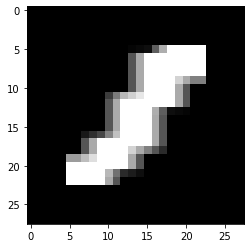



Prediction: 1
=============Prediction=============


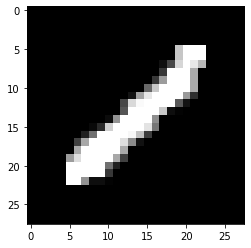



Prediction: 1
=============Prediction=============


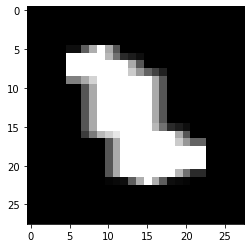



Prediction: 2
=============Prediction=============


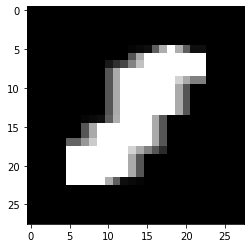



Prediction: 8
=============Prediction=============


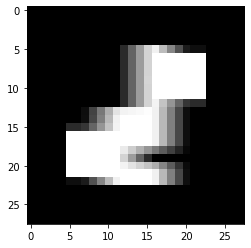



Prediction: 8
=============Prediction=============


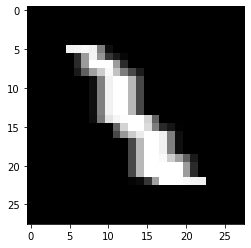



Prediction: 4
=============Prediction=============


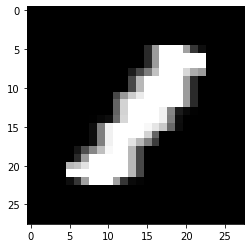



Prediction: 8
=============Prediction=============


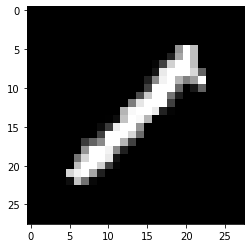



Prediction: 1
=============Prediction=============


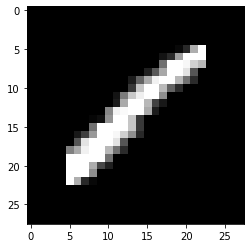



Prediction: 1
=============Prediction=============


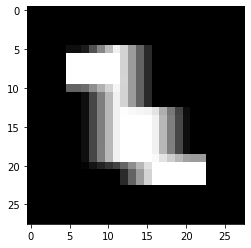



Prediction: 4
=============Prediction=============


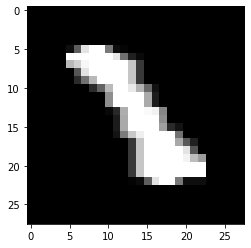



Prediction: 4
=============Prediction=============


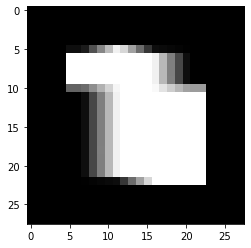



Prediction: 0
=============Prediction=============


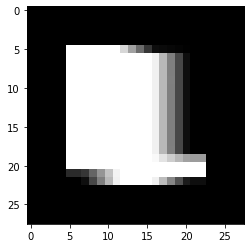



Prediction: 2
=============Prediction=============


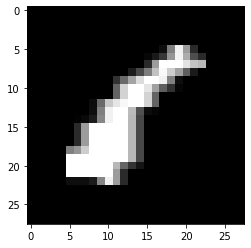



Prediction: 5
=============Prediction=============


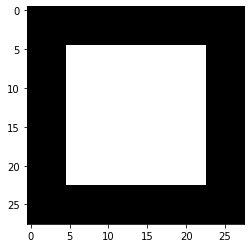



Prediction: 0
=============Prediction=============


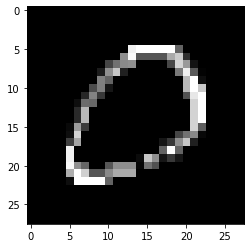



Prediction: 0
=============Prediction=============


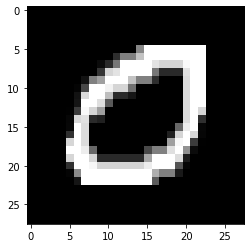



Prediction: 0
=============Prediction=============


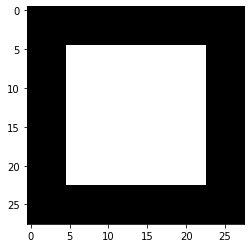



Prediction: 0
=============Prediction=============


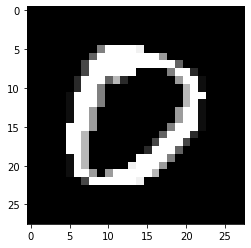



Prediction: 0
=============Prediction=============


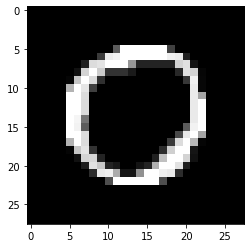



Prediction: 0
=============Prediction=============


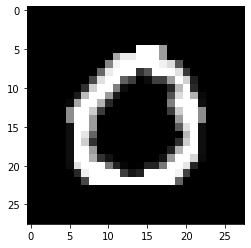



Prediction: 0
=============Prediction=============


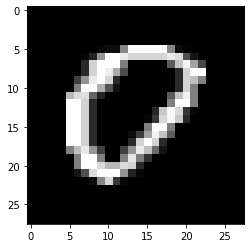



Prediction: 0
=============Prediction=============


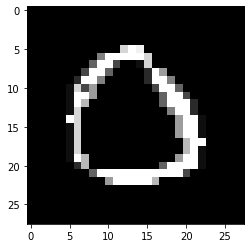



Prediction: 0
=============Prediction=============


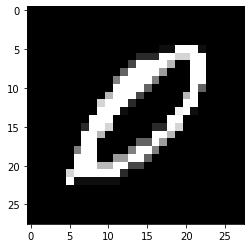



Prediction: 0
=============Prediction=============


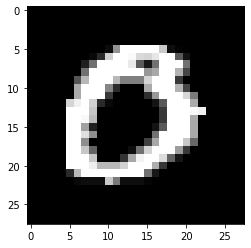



Prediction: 0
=============Prediction=============


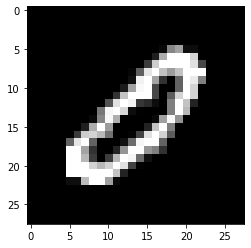



Prediction: 0
=============Prediction=============


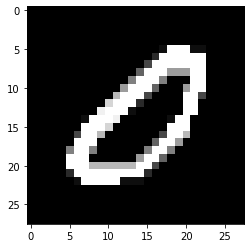



Prediction: 0
=============Prediction=============


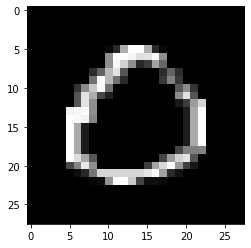



Prediction: 0
=============Prediction=============


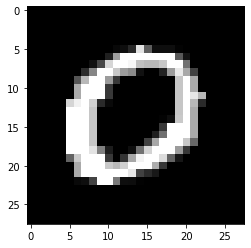



Prediction: 0
=============Prediction=============


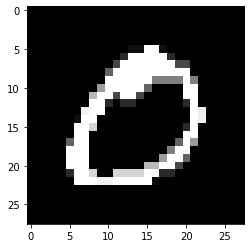



Prediction: 0
=============Prediction=============


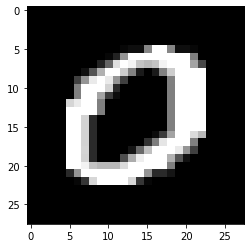



Prediction: 0
=============Prediction=============


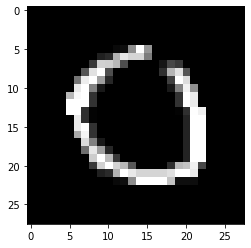



Prediction: 0


In [ ]:
for digit in preprocessed_digits:
  prediction = model.predict(digit.reshape(1, 28, 28, 1))
  print("=============Prediction=============")
  plt.imshow(digit.reshape(28, 28), cmap = "gray")
  plt.show()
  print("\n\nPrediction: {}".format(np.argmax(prediction)))

In [ ]:
predicted = []
for digit in preprocessed_digits:
  prediction = model.predict(digit.reshape(1, 28, 28, 1))
  #print("=============Prediction=============")
  plt.imshow(digit.reshape(28, 28), cmap = "gray")
  #plt.show()
  predicted.append(int(np.argmax(prediction)))
print(predicted)

In [ ]:
import math
x = math.sqrt(100)
print(x)

10.0


In [ ]:
for i in range(1, 10):
  print(i)

1
2
3
4
5
6
7
8
9
